In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train = pd.read_csv("./data-before-data-transformation/train_before_data_transformation.csv", index_col=[0])
val = pd.read_csv("./data-before-data-transformation/val_before_data_transformation.csv", index_col=[0])



In [13]:
train.head()

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,202891.0,36.0,0,3,7.0,2,1,3,4.0,2,3.0,1,2.0,0,3,1,1.0,0,23395.00,0
1,204177.0,47.0,0,3,9.0,3,0,4,5.5,3,4.0,2,5.0,1,5,1,1.0,3,32652.25,0
2,203616.0,30.0,0,3,17.0,2,1,3,5.0,2,3.0,3,2.0,0,4,1,1.0,0,24547.00,0
3,201440.0,36.0,1,1,10.0,0,0,3,3.0,2,4.0,2,1.0,0,3,1,1.0,0,20131.00,0
4,204039.0,27.0,0,1,13.0,0,0,3,5.0,0,4.0,2,3.0,0,3,1,2.0,1,21046.00,0


## Data Transformation

### handling data Imbalance

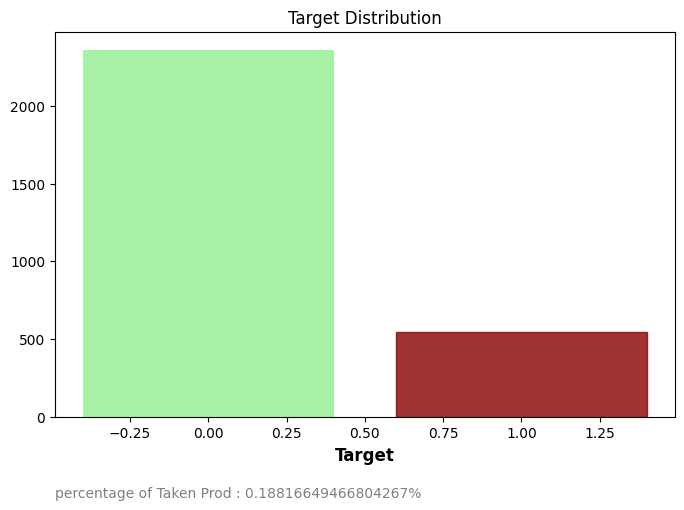

In [17]:
def target_distribution(x, y):
    target_dist = y.value_counts()

    fig, ax = plt.subplots(1, 1, figsize=(8,5))

    barplot = plt.bar(target_dist.index, target_dist, color = 'lightgreen', alpha = 0.8)
    barplot[1].set_color('darkred')

    ax.set_title('Target Distribution')
    ax.annotate("percentage of Taken Prod : {}%".format(y.sum() / len(y)),
                xy=(0, 0),xycoords='axes fraction', 
                xytext=(0,-50), textcoords='offset points',
                va="top", ha="left", color='grey',
                bbox=dict(boxstyle='round', fc="w", ec='w'))

    plt.xlabel('Target', fontsize = 12, weight = 'bold')
    plt.show()

target_distribution(train.drop("ProdTaken", axis=1), train["ProdTaken"])

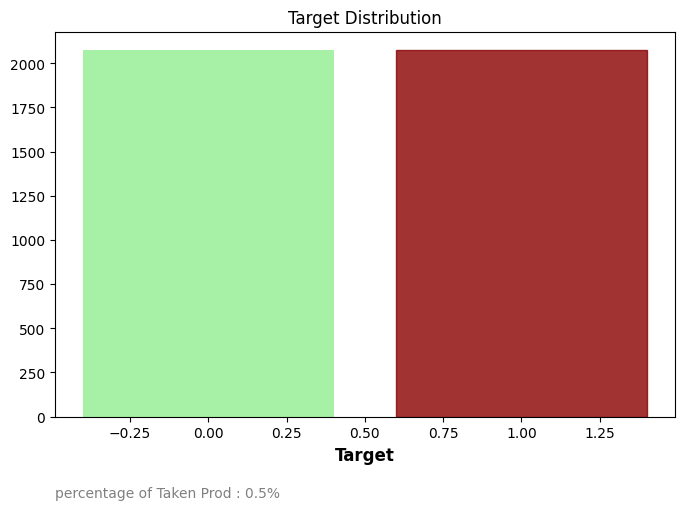

In [19]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(train.drop("ProdTaken", axis=1), train["ProdTaken"])
target_distribution(X_train,y_train)

In [21]:
train_cols = train.columns

In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [22]:
min_max_scaler.fit(train.drop("ProdTaken", axis=1))

MinMaxScaler()

In [24]:
X_train_transformed = min_max_scaler.transform(train.drop("ProdTaken", axis=1))
X_val_transformed = min_max_scaler.transform(val.drop("ProdTaken", axis=1))

In [29]:
X_train_df_transformed = pd.DataFrame(X_train_transformed, columns=train_cols[:-1])
X_val_df_transformed = pd.DataFrame(X_val_transformed, columns=train_cols[:-1])

In [30]:
X_val_df_transformed

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0.789851,0.488372,0.0,1.0,0.063492,0.000000,1.0,0.50,0.625,0.50,0.5,0.666667,0.166667,0.0,0.75,1.0,0.666667,0.00,0.510311
1,0.071209,0.558140,0.0,0.0,0.761905,0.000000,0.0,0.25,0.375,0.75,0.0,0.000000,0.333333,0.0,0.50,0.0,0.000000,0.75,0.914728
2,0.416820,0.372093,0.0,1.0,0.095238,0.000000,1.0,0.25,0.375,0.50,0.0,0.000000,0.166667,0.0,1.00,0.0,0.333333,0.00,0.415601
3,0.947411,0.558140,1.0,0.0,0.349206,0.666667,1.0,0.75,0.625,1.00,0.0,0.666667,0.333333,0.0,0.75,0.0,1.000000,1.00,1.000000
4,0.973194,0.255814,0.0,0.0,0.444444,0.000000,0.0,0.75,0.625,0.00,0.0,0.666667,0.333333,1.0,0.75,1.0,0.666667,0.25,0.411441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,0.022713,0.372093,1.0,0.0,0.253968,0.000000,1.0,0.50,0.875,0.50,0.0,0.000000,0.166667,1.0,1.00,1.0,0.333333,0.00,0.405329
1243,0.767751,0.488372,0.0,1.0,0.126984,0.666667,0.0,0.75,1.000,0.50,0.0,0.666667,0.500000,1.0,0.50,0.0,0.333333,0.00,0.559874
1244,0.666667,0.534884,0.0,0.0,0.507937,0.666667,1.0,0.50,0.875,1.00,0.0,0.000000,0.333333,0.0,0.50,1.0,0.666667,1.00,1.000000
1245,0.379988,0.511628,0.0,1.0,0.095238,0.666667,0.0,0.25,0.375,0.50,0.5,0.666667,0.000000,0.0,0.00,0.0,0.000000,0.00,0.386890


In [32]:
X_train_df_transformed["ProdTaken"] = train["ProdTaken"]
X_val_df_transformed["ProdTaken"] = val["ProdTaken"]
X_train_df_transformed.to_csv("./data-after-transformation/train.csv")
X_val_df_transformed.to_csv("./data-after-transformation/val.csv")